# Basic regression: use case "Pillar mat failure"


### Use seaborn for pairplot
!pip install -q seaborn

### Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

## This example uses the tf.keras API, see this guide for details.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


In [3]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

## The dataset
- The dataset is available from the UCI Machine Learning Repository.

### Get the data

In [37]:
#dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

dataset_path = pd.read_csv('F:\\CON_2019_HMC_PGD-MINESET\\First_model\\resutt_New_Testing_Matrix_sPGD.csv')
dataset_path

,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,MIN_AREA,disp_head,disp_shoulder,disp_abdomen,disp_pelvis,vel_head,vel_shoulder,vel_abdomen,vel_pelvis,contact_force
0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,...,2651.845070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1180.0,1230.0,1080.0,1050.0,613.0,1220.0,624.0,657.0,1040.0,561.0,...,4395.742138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1300.0,830.0,1200.0,863.0,1030.0,673.0,769.0,980.0,999.0,996.0,...,3648.623059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1030.0,875.0,720.0,763.0,831.0,788.0,1250.0,925.0,937.0,742.0,...,2497.228154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,660.0,1150.0,1090.0,908.0,1050.0,895.0,502.0,1230.0,616.0,484.0,...,3024.073442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,773.0,1020.0,1020.0,561.0,1290.0,1240.0,1290.0,1280.0,1100.0,600.0,...,3409.086705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2476,854.0,1290.0,492.0,727.0,1260.0,1230.0,708.0,1040.0,490.0,1150.0,...,3378.125320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2477,920.0,503.0,1190.0,1230.0,1240.0,977.0,1140.0,730.0,1170.0,821.0,...,5853.424241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2478,547.0,882.0,653.0,872.0,622.0,824.0,1140.0,1190.0,1170.0,961.0,...,3798.013552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
column_names = ['HLAYER01','HLAYER02','HLAYER03','HLAYER04','HLAYER05','HLAYER06','HLAYER07','HLAYER08','HLAYER09','HLAYER10','HLAYER11','HLAYER12','HLAYER13','HLAYER14','HLAYER15','HLAYER16','HLAYER17','HLAYER18','HLAYER19','HLAYER20','HLAYER21','HLAYER22','HLAYER23','L02_CNR','L02_FLG','L02_WALL','L03_CNR','L03_FLG','L03_WALL','L04_CNR','L04_FLG','L04_WALL','L05_CNR','L05_FLG','L05_WALL','L06_CNR','L06_FLG','L06_WALL','L07_CNR','L07_FLG','L07_WALL','L08_CNR','L08_FLG','L08_WALL','L09_CNR','L09_FLG','L09_WALL','L10_CNR','L10_FLG','L10_WALL','L11_CNR','L11_FLG','L11_WALL','L12_CNR','L12_FLG','L12_WALL','MIN_AREA']
dataset = dataset_path.loc[:,column_names]
#dataset = raw_dataset
#dataset = dataset_path
dataset.head()

,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_CNR,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,MIN_AREA
0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,...,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,2651.845070
1,1180.0,1230.0,1080.0,1050.0,613.0,1220.0,624.0,657.0,1040.0,561.0,...,988.0,943.0,1190.0,1120.0,1270.0,621.0,709.0,1220.0,945.0,4395.742138
2,1300.0,830.0,1200.0,863.0,1030.0,673.0,769.0,980.0,999.0,996.0,...,471.0,729.0,899.0,539.0,1220.0,700.0,634.0,909.0,571.0,3648.623059
3,1030.0,875.0,720.0,763.0,831.0,788.0,1250.0,925.0,937.0,742.0,...,989.0,633.0,804.0,495.0,955.0,837.0,1310.0,586.0,488.0,2497.228154
4,660.0,1150.0,1090.0,908.0,1050.0,895.0,502.0,1230.0,616.0,484.0,...,616.0,543.0,1110.0,691.0,542.0,496.0,1070.0,656.0,977.0,3024.073442


## Clean the data
- The dataset contains a few unknown values.

### 누락 데이터 포착 
#### isnull() or isna()
- 데이터프레임의 isnull 또는 isna 메서드를 사용하면 누락 데이터의 위치를 알 수 있다.
- 데이터가 많은 경우에는 일일히 볼 수 없으므로 sum 명령으로 누락데이터의 갯수를 셀 수 있다.

isnull().sum()  or isna().sum

In [39]:
dataset.isna().sum()

HLAYER01    0
HLAYER02    0
HLAYER03    0
HLAYER04    0
HLAYER05    0
HLAYER06    0
HLAYER07    0
HLAYER08    0
HLAYER09    0
HLAYER10    0
HLAYER11    0
HLAYER12    0
HLAYER13    0
HLAYER14    0
HLAYER15    0
HLAYER16    0
HLAYER17    0
HLAYER18    0
HLAYER19    0
HLAYER20    0
HLAYER21    0
HLAYER22    0
HLAYER23    0
L02_CNR     0
L02_FLG     0
L02_WALL    0
L03_CNR     0
L03_FLG     0
L03_WALL    0
L04_CNR     0
L04_FLG     0
L04_WALL    0
L05_CNR     0
L05_FLG     0
L05_WALL    0
L06_CNR     0
L06_FLG     0
L06_WALL    0
L07_CNR     0
L07_FLG     0
L07_WALL    0
L08_CNR     0
L08_FLG     0
L08_WALL    0
L09_CNR     0
L09_FLG     0
L09_WALL    0
L10_CNR     0
L10_FLG     0
L10_WALL    0
L11_CNR     0
L11_FLG     0
L11_WALL    0
L12_CNR     0
L12_FLG     0
L12_WALL    0
MIN_AREA    0
dtype: int64

#### missingno 패키지를 사용하면 누락데이터에 대한 시각화를 쉽게 할 수 있다. 


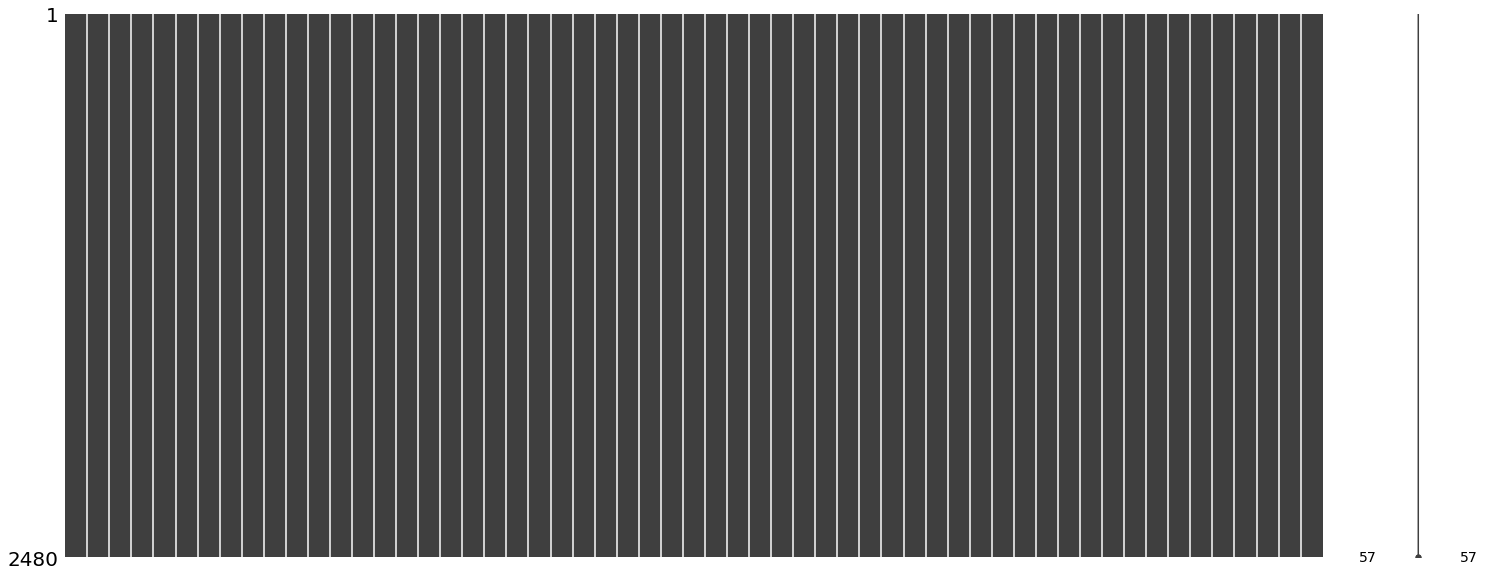

In [40]:
import missingno as msno

msno.matrix(dataset)
plt.show()

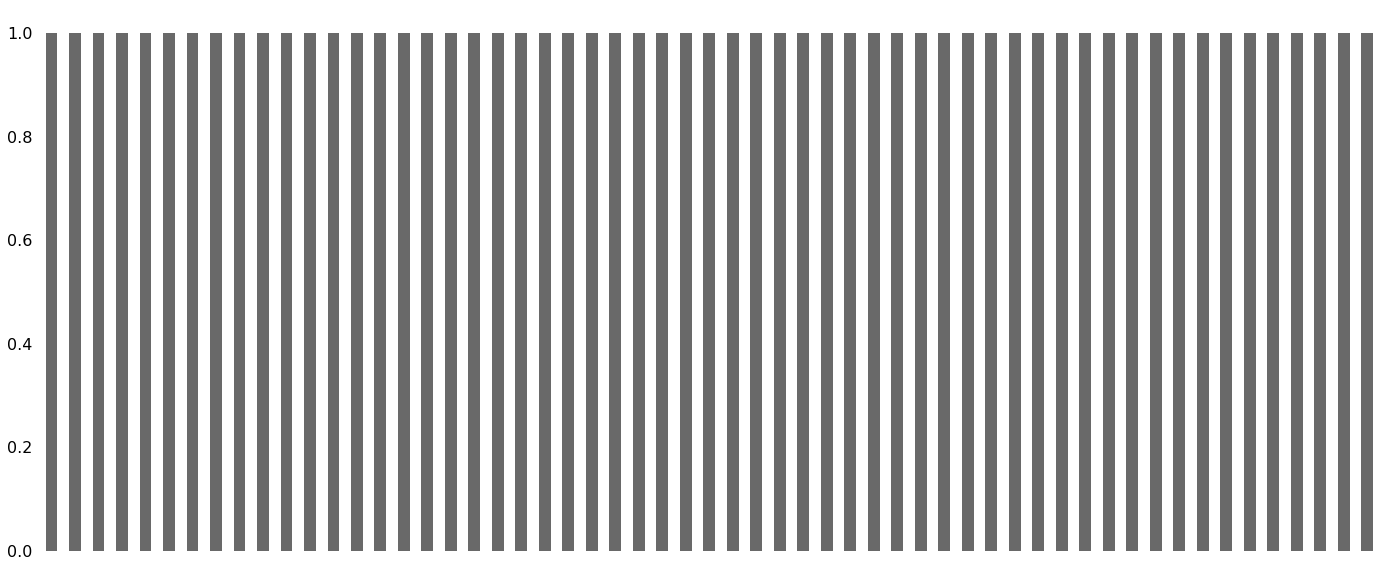

In [41]:
msno.bar(dataset)
plt.show()

### 누락 데이터 제거
-  dropna()명령을 사용하면 누락 데이터가 존재하는 행이나 열을 지울 수 있다.

In [42]:
dataset = dataset.dropna()

In [43]:
#dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [44]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_CNR,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,MIN_AREA
2475,773.0,1020.0,1020.0,561.0,1290.0,1240.0,1290.0,1280.0,1100.0,600.0,...,1090.0,810.0,618.0,1230.0,821.0,562.0,580.0,584.0,1230.0,3409.086705
2476,854.0,1290.0,492.0,727.0,1260.0,1230.0,708.0,1040.0,490.0,1150.0,...,540.0,510.0,789.0,1070.0,881.0,1290.0,796.0,826.0,869.0,3378.125320
2477,920.0,503.0,1190.0,1230.0,1240.0,977.0,1140.0,730.0,1170.0,821.0,...,755.0,978.0,867.0,989.0,524.0,983.0,617.0,1080.0,534.0,5853.424241
2478,547.0,882.0,653.0,872.0,622.0,824.0,1140.0,1190.0,1170.0,961.0,...,551.0,821.0,1020.0,615.0,1000.0,607.0,1050.0,669.0,568.0,3798.013552
2479,864.0,570.0,1060.0,871.0,990.0,1200.0,1260.0,975.0,606.0,984.0,...,1200.0,759.0,983.0,1090.0,1250.0,505.0,1250.0,1280.0,1300.0,2028.524949


### Split the data into train and test
- train: 80%, test 20%

In [45]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

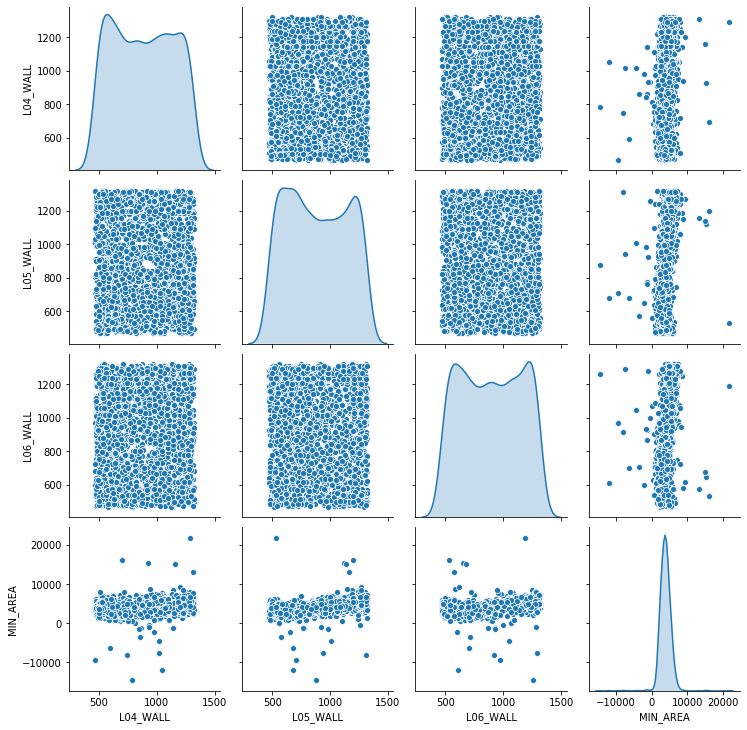

In [46]:
sns.pairplot(train_dataset[["L04_WALL", "L05_WALL", "L06_WALL", "MIN_AREA"]], diag_kind="kde")

### look at the overall statistics

In [47]:
train_stats = train_dataset.describe()
train_stats.pop("MIN_AREA")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
HLAYER01,1984.0,885.697581,259.239419,468.0,652.75,880.0,1120.0,1320.0
HLAYER02,1984.0,889.493448,260.740914,468.0,653.00,882.0,1130.0,1320.0
HLAYER03,1984.0,896.057460,262.898752,468.0,658.75,896.0,1130.0,1320.0
HLAYER04,1984.0,894.027722,261.002047,468.0,656.75,893.5,1130.0,1320.0
HLAYER05,1984.0,893.768649,261.292203,468.0,652.00,890.5,1140.0,1320.0
HLAYER06,1984.0,891.682964,258.164714,468.0,649.75,897.0,1120.0,1320.0
HLAYER07,1984.0,901.911290,257.840925,468.0,670.75,908.5,1140.0,1320.0
HLAYER08,1984.0,897.555444,256.727785,469.0,665.00,897.0,1130.0,1320.0
HLAYER09,1984.0,890.478327,259.582328,469.0,657.50,885.5,1130.0,1320.0
HLAYER10,1984.0,888.984879,254.299290,468.0,667.00,888.0,1120.0,1320.0


### "Split features from labels"
- Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

In [48]:
train_labels = train_dataset.pop('MIN_AREA')
test_labels = test_dataset.pop('MIN_AREA')

### Normalize the data
- Look again at the train_stats block above and note how different the ranges of each feature are.
- It is good practice to normalize features that use different scales and ranges. 
- Although the model might converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

In [49]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

### Build the model
- Let's build our model. Here, we'll use a Sequential model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

#### tf.keras.Model.compile

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
- optimizer: 훈련 과정을 설정합니다. tf.keras.optimizers.Adam이나 tf.keras.optimizers.SGD와 같은 tf.keras.optimizers 아래의 옵티마이저 객체를 전달합니다. 기본 매개변수를 사용할 경우 'adam'이나 'sgd'와 같이 문자열로 지정할 수도 있습니다.
- loss: 최적화 과정에서 최소화될 손실 함수(loss function)를 설정합니다. 평균 제곱 오차(mse)와 categorical_crossentropy, sparse_categorical_crossentropy, binary_crossentropy 등이 자주 사용됩니다. 손실 함수의 이름을 지정하거나 tf.keras.losses 모듈 아래의 호출 가능한 객체를 전달할 수 있습니다.
- metrics: 훈련을 모니터링하기 위해 사용됩니다. 이름이나 tf.keras.metrics 모듈 아래의 호출 가능한 객체입니다.

In [50]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape'])


  return model

In [51]:
model = build_model()

### Inspect the model

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                3648      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 7,873
Trainable params: 7,873
Non-trainable params: 0
_________________________________________________________________


#### Take a batch of 10 examples from the training data and call model.predict on it.

- model.predict

In [53]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-1.0881422 ],
       [-1.7139305 ],
       [-0.68488574],
       [-1.3343742 ],
       [-0.68690884],
       [-0.79478794],
       [-1.0400764 ],
       [-1.1659439 ],
       [-0.7788743 ],
       [-1.6305931 ]], dtype=float32)

### Train the model
- 1000 epochs
#### epoch
- 한 번의 epoch는 인공 신경망에서 전체 데이터 셋에 대해 forward pass/backward pass 과정을 거친 것을 말함. 즉, 전체 데이터 셋에 대해 한 번 학습을 완료한 상태

In [54]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:18095773.7309,  mae:3986.4775,  mape:99.8719,  mse:18095770.0000,  val_loss:17496294.1461,  val_mae:3921.5359,  val_mape:99.6813,  val_mse:17496294.0000,  
....................................................................................................
Epoch: 100, loss:1145574.2637,  mae:497.4889,  mape:15.3469,  mse:1145574.5000,  val_loss:1082909.5000,  val_mae:643.0809,  val_mape:21.8536,  val_mse:1082909.5000,  
....................................................................................................
Epoch: 200, loss:839862.3033,  mae:396.2797,  mape:11.8375,  mse:839862.2500,  val_loss:1159615.5334,  val_mae:699.7739,  val_mape:23.7423,  val_mse:1159615.5000,  
....................................................................................................
Epoch: 300, loss:619547.9154,  mae:303.5565,  mape:8.8811,  mse:619547.9375,  val_loss:1249667.2966,  val_mae:753.4072,  val_mape:25.3814,  val_mse:1249667.2500,  
.............................

In [55]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,671.151803,19.498363,671.151672,0.562083,1.928690e+06,1004.003601,1928689.500,31.529510,995
996,563.169883,17.981197,563.169800,0.519830,1.921589e+06,1001.899780,1921589.375,31.471596,996
997,591.729354,18.382381,591.729309,0.569354,1.931785e+06,1004.933899,1931785.000,31.643539,997
998,578.909445,17.989428,578.909424,0.531781,1.933037e+06,1005.876160,1933037.250,31.638071,998
999,541.087490,17.607710,541.087463,0.498188,1.923938e+06,1001.138245,1923938.125,31.405155,999


In [56]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MIN_AREA]')

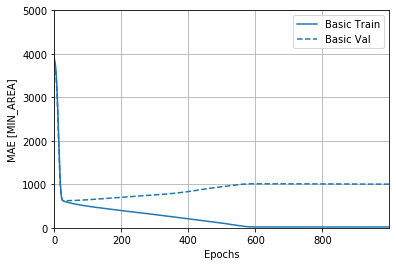

In [57]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 5000])
plt.ylabel('MAE [MIN_AREA]')

Text(0, 0.5, 'MSE [MIN_AREA^2]')

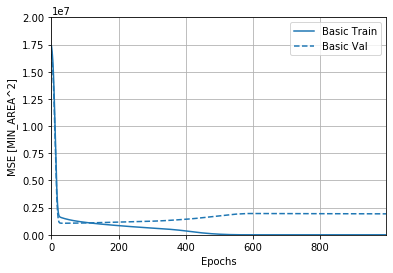

In [58]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20000000])
plt.ylabel('MSE [MIN_AREA^2]')

In [59]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:18072471.8425,  mae:3983.6792,  mape:99.8038,  mse:18072470.0000,  val_loss:17458646.7657,  val_mae:3917.0029,  val_mape:99.5518,  val_mse:17458646.0000,  
..........................................................

Text(0, 0.5, 'MAE [MIN_AREA]')

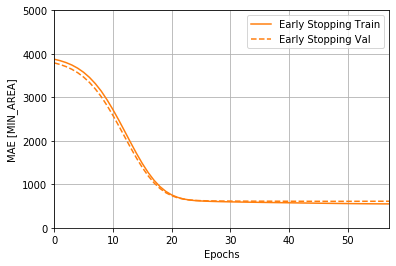

In [60]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 5000])
plt.ylabel('MAE [MIN_AREA]')

In [61]:
loss, mae, mse, mape = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MIN_AREA".format(mae))

496/496 - 0s - loss: 542146.5751 - mae: 537.2583 - mse: 542146.5625 - mape: 15.6213
Testing set Mean Abs Error: 537.26 MIN_AREA


### Make predictions
- predict MIN_AREA values using data in the testing set

In [64]:
test_predictions = model.predict(normed_test_data).flatten()
f = open('F:\\CON_2019_HMC_PGD-MINESET\\First_model\\prediction.csv','w')
for i in range(0,len(test_predictions)):
    print(test_predictions[i])
    f.write(str(test_predictions[i])+',')
f.close()
print(test_predictions)


2052.5332
2373.5261
5539.267
3068.983
4879.1904
3644.726
3124.8423
3099.21
4108.246
3449.2166
4811.696
2435.0415
3949.7578
5427.1895
3333.2705
3302.3828
1935.4882
3783.9912
1787.4598
2400.896
2058.0461
3440.879
2357.7832
4529.372
4180.5938
3113.6436
4861.4863
3083.8445
4487.1777
4458.256
4403.012
5934.6904
4681.887
4552.089
3059.0312
4808.59
3634.3242
3922.358
4899.3613
6848.7266
4618.5522
3630.052
2120.516
2965.3005
5375.021
4970.898
5319.4023
3500.316
4699.3433
3401.9495
3898.7612
5126.5483
4645.974
3172.088
3454.9375
2580.4834
5253.828
5300.6406
3016.9717
4521.5923
2527.5369
2744.2422
2735.4497
3517.2808
5039.9766
3648.0137
4563.062
6206.165
3774.419
1991.4017
4564.576
2319.088
4184.425
4930.6777
5212.014
4063.4941
5888.081
3214.83
4267.538
5230.6353
2354.0544
5827.3887
4543.361
2858.1323
3922.0508
4512.7207
3790.6445
3060.4333
5050.9893
3020.0137
4164.834
3354.9502
3090.7876
3351.4946
6291.9297
4686.051
4079.333
2982.757
4789.883
4865.4355
3666.9507
3500.0293
4409.0806
3388.5771
49

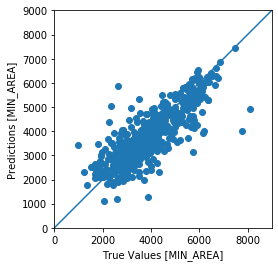

In [65]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MIN_AREA]')
plt.ylabel('Predictions [MIN_AREA]')
lims = [0, 9000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

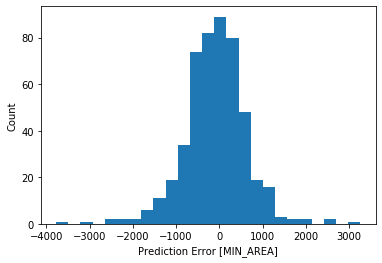

In [66]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MIN_AREA]")
_ = plt.ylabel("Count")

In [ ]:
model.summary()